# IMDB DATASET

목표: 리뷰 텍스트를 이용하여 긍정적인 영화 리뷰인지 부정적인 영화 리뷰인지 분류한다

구성: 2,5000개의 훈련 데이터, 2,5000개의 테스트 데이터(각각은 50% 긍정, 50% 부정으로 이루어짐)

In [1]:
from keras.datasets import imdb

(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)
#num_words=10000은 가장 자주 나타나는 단어 1만개를 사용하겠다는 의미
#train_data, train_labels는 부정=0, 긍정=1로 표현된 리스트
print(train_data[0]) #첫번째 리뷰의 단어 인덱스 리스트
print(train_labels) #긍정 또는 부정의 인덱스

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 ... 0 1 0]


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): #one-hot encoding함수 구현
    results = np.zeros((len(sequences),dimension)) #행:sequences, 열:dimension 크기의 원소가 0인 배열 생성
    for i, sequence in enumerate(sequences): #enumerate는 (리스트의 원소 인덱스, 원소)로 반환한다. -> i:인덱스 sequence:원소 
        results[i,sequence] = 1. #results[i]에서 특정 인덱스의 위치를 1로 만든다
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0]) #0~2번 인덱스는 각각 패딩, 문서 시작, 사전에 없음을 의미한다

[0. 1. 1. ... 0. 0. 0.]


In [3]:
y_train = np.asarray(train_labels).astype('float32') #0 또는 1 ->  0.0 또는 1.0
y_test = np.asarray(test_labels).astype('float32')
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,))) #relu는 음수를 0으로 만든다
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) #sigmoid는 임의의 값을 0~1사이로 압축하기 때문에 출력을 확률처럼 해석할 수 있다

In [18]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
# optimizer의 매개변수를 수정할 때
# from tensorflow.keras import optimizers
# 
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), #learning rate 설정
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

In [20]:
# 손실함수, 측정 함수 custom할 때
# from keras import losses
# from keras import metrics
#
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])

In [21]:
x_val = x_train[:10000] #처음부터 인덱스9999까지
partial_x_train = x_train[10000:] #10000부터 끝까지
y_val = y_train[:10000] #검증할 데이터
partial_y_train = y_train[10000:] #훈련시킬 데이터

In [22]:
history = model.fit(partial_x_train, #fit 메서드는 History 객체를 반환한다. 객체는 훈련하는 동안 발생한 모든 정보를 딕셔너리에 보관
                   partial_y_train,
                   epochs=20, #20번 반복
                   batch_size=512, #512개 뽑아서
                   validation_data=(x_val,y_val)) #검증 데이터 추가

Epoch 1/20


ValueError: in user code:

    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 2000), found shape=(None, 3000)


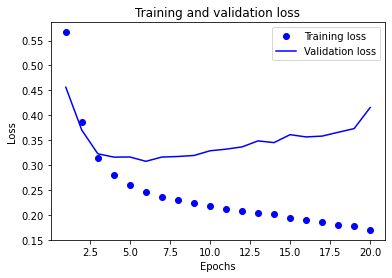

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.show()

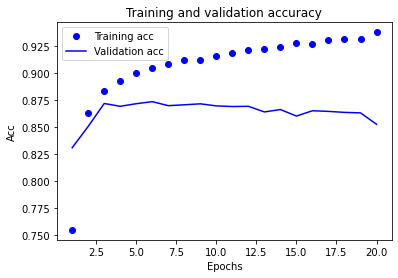

In [15]:
plt.clf() # 생성한 그래프 초기화
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [16]:
#4번째 epochs에서부터 overfitting되었음 
#따라서 epochs를 4까지로 제한하고 훈련 재시작
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4


ValueError: in user code:

    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jw101\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 10000), found shape=(None, 3000)


활성화 함수{ => 이전 레이어의 값을 다음 레이어로 전달하는 역할

    softmax:다중분류, 확률을 리턴,총합이 1이다
    
    relu:음수를 0으로 만든다
    
    sigmoid: 이진분류, 절댓값이 커질수록 미분계수가 작아져 죄종 계층에 미치는 영향이 줄어든다.=>vanishing gradient problem
    
             0~1로 압축하기 때문에 확률로 해석이 가능하다.
}
손실 함수{ => 목표값과 출력값의 차

    binary_crossentropy:sigmoid 활성화 함수 다음에 연계되어 사용
    
    categorical_crossentropy:softmax활성화 함수 다음에 연계되어 사용
    
    mse:평균 제곱 오차->예측과 타깃 사이의 거리의 제곱 
    
    mae:평균 절대 오차->예측과 타깃 사이 거리의 절댓값
}